# EcoFOCI evaluation/application of Glider Tools for post processing

**Summary**


**Resources**

- [https://github.com/GliderToolsCommunity/GliderTools](GliderTools Python Package) for secondary processing of data
- [https://gliders.ioos.us/data/](IOOS Glider DAC)
- [https://underwatergliders.org/index.php/data-management-tools/](UnderWaterGlider Users Group)

## Oculus Glider Data Applicability

There are pre-existing QC procedures built into both, SeaGlider data (what GliderTools works with) and Oculus data as developed by UW.

There are Engineering parameters and science parameters (including platform instrumentation and additional science instrumentation)

## Oculus Glider Data Visualization (PMEL local or FOCI NRT)

- Kongsberg pilot webpage (immediate information but only for pilots and PI's)
- internal plotly dashboard (NRT / NRT QC) - of binned profile data or timeseries data... quick to plot and look at
- internal plotly dashboard (Delayed Mode QC), see gliderTools + IOOS QARTOD + PMEL QC
- **GliderScope???** [https://imos.org.au/gliderscope](link)  (gui third party-matlab based runtime-needs admin to install on Mac but also is available for Win)

## Other Services and gliders
- [https://gliders.ioos.us/map/](IOOS)

## Oculus Glider Distribition

Via Internal ERDDAP:
- NRT (Pre-existing QC from timeseries files or profile files made by the basestation)
    - profile files are binned by depth intervals (5m) and may be better hosted as a "gridded" dataset via erddap than tabular
    - timeseries is one long datastream
- Processed and Cleaned
    - initial qc with improved dials?
    - GliderTools
    - IOOS QARTOD QC
- Modified Science Routines
    - BeringSea interface tools
    
Via IOOS GliderDAC

## Examples from BS long mission (2017) 

Local erddap has two datastreams available for simplicity... the timeseries merged profiles data and the upanddown merged profiles data (from the base station).

### Start with gridded (5m) basestation data (NRT level quicklooks with some on base station QC)

In [1]:
from erddapy import ERDDAP
import pandas as pd

server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)
# timeseries or upanddown (profiles)
df = pd.read_csv(e.get_search_url(response='csv', search_for='datasets_sg401_2017_'))
df

,griddap,Subset,tabledap,Make A Graph,wms,files,Title,Summary,FGDC,ISO 19115,Info,Background Info,RSS,Email,Institution,Dataset ID
0,NaN,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,NaN,http://akutan.pmel.noaa.gov:8080/erddap/files/...,Physical data collected from Seaglider SG401 d...,"PMEL SG401 Bering Sea Test Apr 26, 2017. Up an...",http://akutan.pmel.noaa.gov:8080/erddap/metada...,http://akutan.pmel.noaa.gov:8080/erddap/metada...,http://akutan.pmel.noaa.gov:8080/erddap/info/d...,https://data.nodc.noaa.gov/accession/0092291,http://akutan.pmel.noaa.gov:8080/erddap/rss/da...,http://akutan.pmel.noaa.gov:8080/erddap/subscr...,NOAA/PMEL,datasets_sg401_2017_upanddown
1,NaN,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,http://akutan.pmel.noaa.gov:8080/erddap/tabled...,NaN,http://akutan.pmel.noaa.gov:8080/erddap/files/...,Physical data collected from Seaglider SG401 d...,"PMEL SG401 Bering Sea Test Apr 26, 2017. Times...",http://akutan.pmel.noaa.gov:8080/erddap/metada...,http://akutan.pmel.noaa.gov:8080/erddap/metada...,http://akutan.pmel.noaa.gov:8080/erddap/info/d...,https://data.nodc.noaa.gov/accession/0092291,http://akutan.pmel.noaa.gov:8080/erddap/rss/da...,http://akutan.pmel.noaa.gov:8080/erddap/subscr...,NOAA/PMEL - EcoFOCI,datasets_sg401_2017_timeseries
2,http://akutan.pmel.noaa.gov:8080/erddap/gridda...,NaN,NaN,http://akutan.pmel.noaa.gov:8080/erddap/gridda...,NaN,http://akutan.pmel.noaa.gov:8080/erddap/files/...,"Physical, chemical, and biological data collec...",SG401 Bering Sea. Applied Physics Lab\n ...,NaN,NaN,http://akutan.pmel.noaa.gov:8080/erddap/info/d...,https://data.nodc.noaa.gov/accession/0092291,http://akutan.pmel.noaa.gov:8080/erddap/rss/da...,http://akutan.pmel.noaa.gov:8080/erddap/subscr...,Applied Physics Lab University of Washington S...,datasets_sg401_2017_upanddown_gridded


In [2]:
#thin convenience wrapper for loading FOCI erddap glider data
import GliderDataLoader

In [3]:
sg401=GliderDataLoader.erddap_glider('datasets_sg401_2017_upanddown')
sg401.list_data(verbose=True)

0            datasets_sg401_2017_upanddown
1    datasets_sg401_2017_upanddown_gridded
Name: Dataset ID, dtype: object


In [4]:
variables = {'datasets_sg401_2017_upanddown':['profile_id',
                     'latitude', 
                     'depth', 
                     'longitude', 
                     'salinity',
                     'density', 
                     'time', 
                     'temperature']}
sg401.constrain_data(variables=variables,start_date='2017-01-01T00:00:00Z')
dfs = sg401.load_data(year='2017')

datasets_sg401_2017_upanddown
datasets_sg401_2017_upanddown_gridded
Failed to generate url datasets_sg401_2017_upanddown_gridded


(<Figure size 1224x144 with 2 Axes>, <AxesSubplot:ylabel='Depth (m)'>)

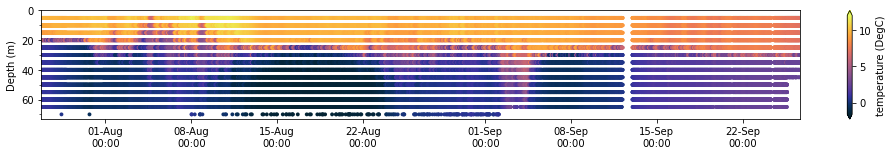

In [5]:
sg401.plot_timeseries(dfs['datasets_sg401_2017_upanddown'].sort_index(), 'temperature (degree_C)','depth (m)','temperature (DegC)')

### Use Gridded ERRDAP Dataset if Available for binned data

In [31]:
#all
import cmocean
e.protocol = 'griddap'
e.dataset_id='datasets_sg401_2017_upanddown_gridded'
e.variables = ['temperature','ctd_time']
e.response = 'ncCF'
ds = e.to_xarray(decode_times=True)


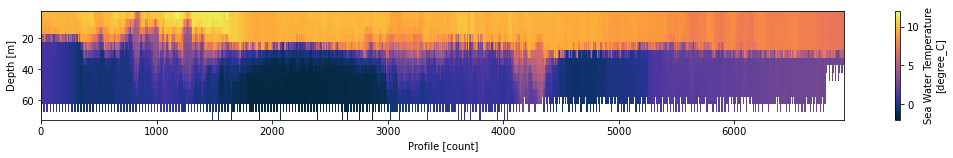

In [40]:
ds.temperature.T.plot(yincrease=False,cmap=cmocean.cm.thermal,vmin=-2,vmax=12,figsize=(18,2))

### Now using larger archived timeseries data ((NRT level quicklooks with some on base station QC)

In [19]:
sg401=GliderDataLoader.erddap_glider('datasets_sg401_2017_timeseries')
sg401.list_data(verbose=True)

0    datasets_sg401_2017_timeseries
Name: Dataset ID, dtype: object


In [20]:
variables = {'datasets_sg401_2017_timeseries':['profile_id',
                     'latitude', 
                     'depth', 
                     'longitude', 
                     'salinity',
                     'density', 
                     'time', 
                     'temperature']}
sg401.constrain_data(variables=variables,start_date='2017-01-01T00:00:00Z')
dfs = sg401.load_data(year='2017')

datasets_sg401_2017_timeseries


(<Figure size 1224x144 with 2 Axes>, <AxesSubplot:ylabel='Depth (m)'>)

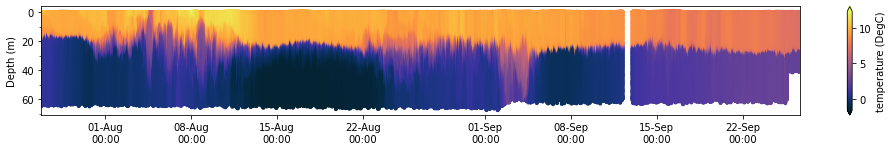

In [22]:
sg401.plot_timeseries(dfs['datasets_sg401_2017_timeseries'].sort_index(), 'temperature (degree_C)','depth (m)','temperature (DegC)')

## Loading individual dive datasets and running GliderTools

This isn't truly Delayed mode data (just delayed mode processing)

In [23]:
%load_ext autoreload
# pylab for more MATLAB like environment and inline displays plots below cells 
%pylab inline

# if gsw Warning shows, manually install gsw if possible - will still work without
import glidertools as gt
from cmocean import cm as cmo  # we use this for colormaps

Populating the interactive namespace from numpy and matplotlib


# Loading data

## Working with Seaglider base station files

GliderTools supports loading Seaglider files, including `scicon` data (different sampling frequencies).  
There is a function that makes it easier to find variable names that you'd like to load: `gt.load.seaglider_show_variables`  

This function is demonstrated in the cell below.
The function accepts a **list of file names** and can also receive a string with a wildcard placeholder (`*`) and basic regular expressions are also supported. In the example below we use a simple asterisk placeholder for all the files. 

Note that the function chooses only one file from the passed list or glob string - this file name will be shown. The returned table shows the variable name, dimensions, units and brief comment if it is available. 

In [36]:
#skipp first 1000 dives
filenames = 'test_data/sg401_2017/p401[123]*.nc'

gt.load.seaglider_show_variables(filenames)

information is based on file: test_data/sg401_2017/p4012283.nc


,dims,units,comment
name,,,
gc_data_pts,gc_event,1,
gc_depth,gc_event,meters,
gc_end_secs,gc_event,seconds since 1970-1-1 00:00:00,End of GC time in GMT epoch format
gc_gcphase,gc_event,,
gc_humidity,gc_event,percent,Internal relative humidity
gc_int_press,gc_event,psia,Internal pressure
gc_ob_vertv,gc_event,cm/s,
gc_pitch_ad,gc_event,1,
gc_pitch_ad_start,gc_event,1,


In [37]:
names = [
    'ctd_depth',
    'ctd_time',
    'ctd_pressure',
    'salinity',
    'salinity_raw',
    'temperature',
    'temperature_raw',
    'temperature_qc',
    'eng_wlbb2fl_sig470nm',
    'eng_wlbb2fl_sig695nm',
    'eng_wlbb2fl_sig700nm'
]

ds_dict = gt.load.seaglider_basestation_netCDFs(filenames, names, return_merged=True, keep_global_attrs=False)



DIMENSION: sg_data_point
{latitude, longitude, temperature, ctd_pressure, salinity_raw, temperature_qc, ctd_time, salinity, ctd_depth, temperature_raw}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2566/2566 [00:19<00:00, 129.19it/s]



Cannot merge data - not enough time indexed DataFrames
Returning unmerged dataframes


some file lack enough information/details (or are incomplete dives):
- early dive issues (2??)
- p401067[34]

In [39]:
ds_dict['sg_data_point']

<xarray.Dataset>
Dimensions:          (sg_data_point: 349365)
Coordinates:
    latitude         (sg_data_point) float64 61.48 61.48 61.48 ... 57.93 57.93
    longitude        (sg_data_point) float64 -173.8 -173.8 ... -169.1 -169.1
    ctd_depth        (sg_data_point) float64 0.7374 0.2013 ... 1.294 -0.1832
    ctd_time_dt64    (sg_data_point) datetime64[ns] 2017-08-13T21:07:40 ... 2...
Dimensions without coordinates: sg_data_point
Data variables:
    temperature      (sg_data_point) float64 9.512 9.513 9.511 ... 7.004 7.024
    ctd_pressure     (sg_data_point) float64 0.7451 0.2038 ... 1.306 -0.1844
    salinity_raw     (sg_data_point) float64 31.16 31.15 31.15 ... 31.46 2.506
    temperature_qc   (sg_data_point) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ctd_time         (sg_data_point) float64 1.503e+09 1.503e+09 ... 1.506e+09
    salinity         (sg_data_point) float64 nan nan nan nan ... 31.46 nan nan
    temperature_raw  (sg_data_point) float64 9.512 9.513 9.511 ... 7.004 7.023
    dives            (sg_data_point) float64 1e+03 1e+03 ... 3.612e+03 3.612e+03
Attributes:
    date_created:             2021-07-26 13:55:28
    number_of_dives:          3612.0
    files:                    ['p4011000.nc', 'p4011001.nc', 'p4011002.nc', '...
    time_coverage_start:      2017-08-13 21:07:40
    time_coverage_end:        2017-09-26 16:05:42
    geospatial_vertical_min:  -0.5030842835078432
    geospatial_vertical_max:  67.57316616647842
    geospatial_lat_min:       57.89913235353872
    geospatial_lat_max:       62.14208166934556
    geospatial_lon_min:       -174.5055983333333
    geospatial_lon_max:       -168.8639759711956
    processing:               [2021-07-26 13:55:28] imported data with Glider...

In [43]:
dat = ds_dict['sg_data_point'].rename({
    'ctd_pressure': 'pressure',
    'ctd_depth': 'depth',
    'ctd_time_dt64': 'time',
    'eng_wlbb2fl_sig695nm': 'flr_raw'
})


# name coordinates for quicker plotting
x = dat.dives
y = dat.depth

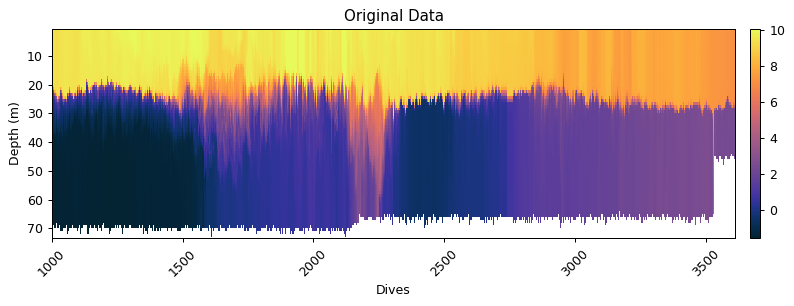

In [51]:
gt.plot(x, y, dat.temperature_raw, shading='nearest', cmap=cmo.thermal, robust=True)
title('Original Data')
show()

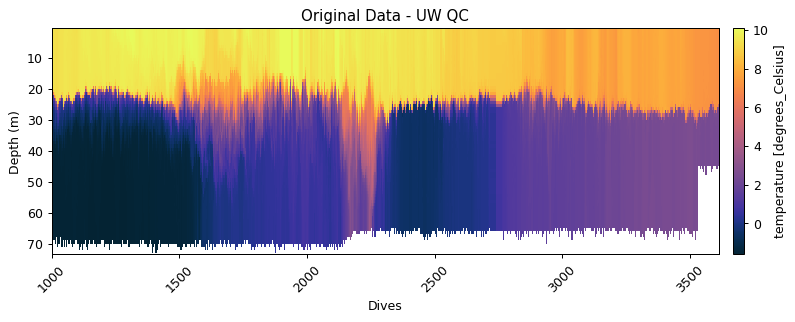

In [52]:
gt.plot(x, y, dat.temperature, shading='nearest', cmap=cmo.thermal, robust=True)
title('Original Data - UW QC')
show()


Physics Variable:
	Removing outliers with IQR * 1.5: 0 obs
	Removing spikes with rolling median (spike window=5)


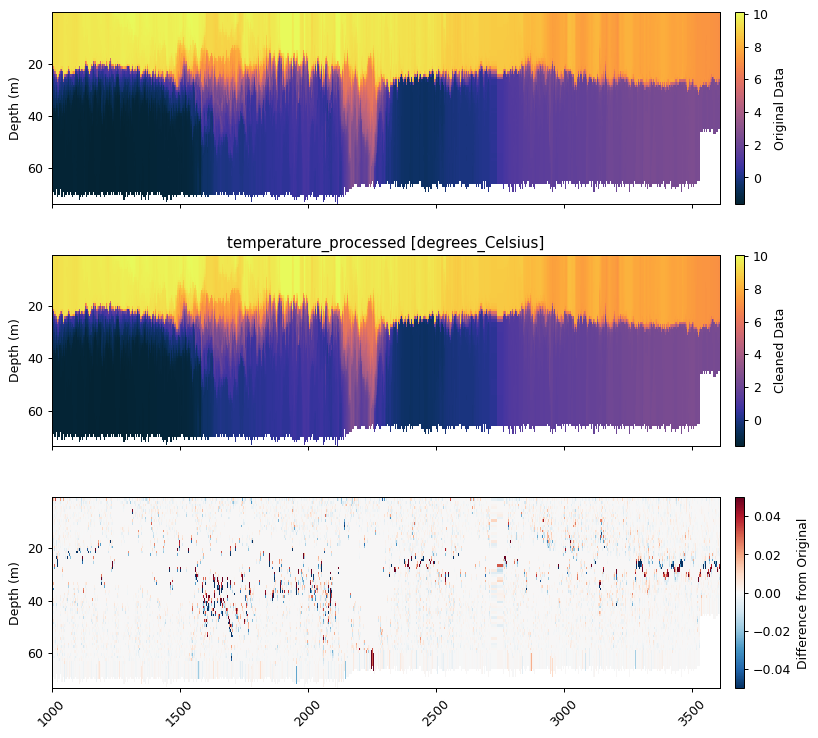

In [64]:
#lots of options available, but lets filter (without much smoothing if any at all, lets do it in the verticle for sure and contemplate horizonatl filtering too)

temp_qc = gt.calc_physics(dat.temperature, x, y, 
                          iqr=1.5, depth_threshold=0, #<-- depth 
                          spike_window=5, spike_method='median',
                          savitzky_golay_window=0, savitzky_golay_order=2) #<--challenged by sharp interface, made it clearly wrong with window=11, order=2

# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, dat.temperature, cmap=cmo.thermal, ax=ax[0])
gt.plot(x, y, temp_qc, cmap=cmo.thermal, ax=ax[1])
gt.plot(x, y, temp_qc - dat.temperature, cmap=cm.RdBu_r, vmin=-0.05, vmax=0.05, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()


Physics Variable:
	Removing outliers with IQR * 2.5: 313 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)


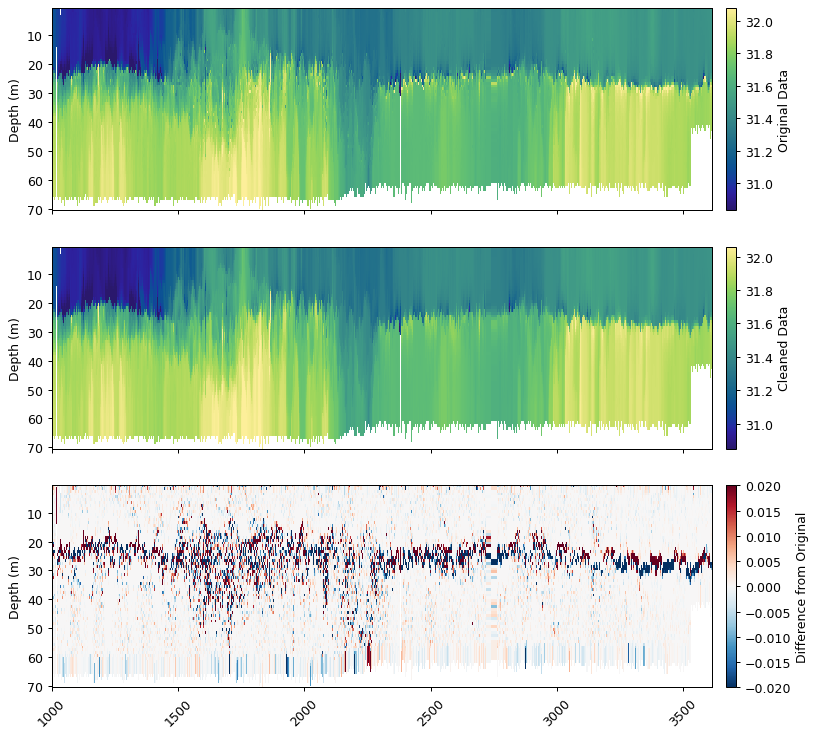

In [66]:
#lots of options available, but lets filter (without much smoothing if any at all, lets do it in the verticle for sure and contemplate horizonatl filtering too)
# how does it do for despiking at interface?

salt_qc = gt.calc_physics(dat.salinity, x, y, 
                          mask_frac=0.2, iqr=2.5, 
                          spike_window=5, spike_method='median', 
                          savitzky_golay_window=0, savitzky_golay_order=2)
        
# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, dat.salinity, cmap=cmo.haline, ax=ax[0])
gt.plot(x, y, salt_qc, cmap=cmo.haline, ax=ax[1])
gt.plot(x, y, salt_qc - dat.salinity, cmap=cm.RdBu_r, vmin=-0.02, vmax=0.02, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

#### Insert data into original dataset

In [70]:
dat['temp_gt_qc'] = temp_qc
dat['salt_gt_qc'] = salt_qc

## Derived Variables

In [73]:
dens0 = gt.physics.potential_density(salt_qc, temp_qc, dat.pressure, dat.latitude, dat.longitude)

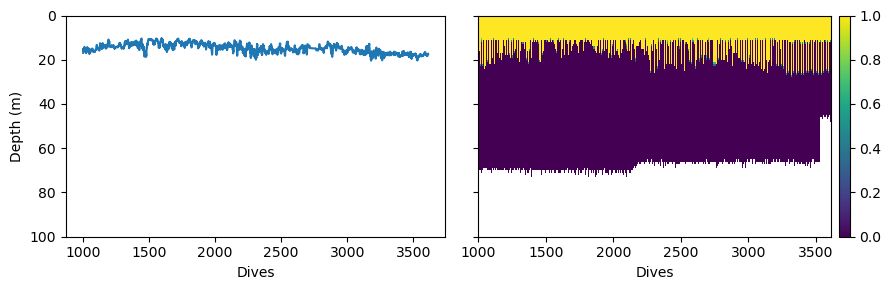

In [75]:
mld = gt.physics.mixed_layer_depth(x, y, dens0)
mld_smoothed = mld.rolling(10, min_periods=3).mean()

mld_mask = gt.physics.mixed_layer_depth(x, y, dens0, return_as_mask=True)
mld_grid = gt.grid_data(x, y, mld_mask, verbose=False)

fig, ax = plt.subplots(1, 2, figsize=[9, 3], dpi=100, sharey=True)

mld_smoothed.plot(ax=ax[0])
gt.plot(mld_grid, ax=ax[1])

[a.set_ylim(100, 0) for a in ax]

ax[0].set_ylabel('Depth (m)')
[a.set_xlabel('Dives') for a in ax]
xticks(rotation=0)

fig.tight_layout()

## Ancillary Instrumentation: Backscatter/Fluorometry , Oxygen , PAR

- apply calibration curves from factor
- despike in vertical
- quenching and other fluorometric adjustments
- oxygen equilibration in ML boundary


# Gridding and interpolation

### Vertical gridding
It is often more convenient and computationally efficient to work with data that has been gridded to a standard vertical grid (i.e. depths have been binned). 
GliderTools offers very easy to use and efficient tools to grid data once all the processing has been completed. 

The first task is to select the bin size of the data that will be gridded. 
GliderTools automatically selects bin sizes according to the sampling frequency of the dataset for every 50m.
This is shown in the figure below, where the 2D histogram shows the sampling frequency (by depth) and the line shows the automatically selected bin size rounded up to the nearest 0.5m.

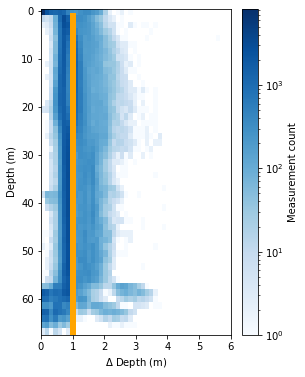

In [76]:
ax = gt.plot.bin_size(dat.depth, cmap=mpl.cm.Blues)
ax.set_xlim(0, 6)
line = ax.get_children()[1]
line.set_linewidth(6)
line.set_color('orange')

legend = ax.get_children()[-2]
legend.set_visible(False)

1m seems the optimal gridding for the 2017 SG missions